## Set local path and import packages

In [1]:
#Set Local path
local_path='C:/SKCY/Python/ML/practice/'

In [2]:
#Import pacakges
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [3]:
df_flight=pd.read_csv(local_path+'flight_data.csv',sep=',',na_values='NA')
df_flight.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00


### Remove Null Values from relevant field

In [4]:
#Null value removal from dep_delay, arr_delay,air_time

#dep_delay fill null by mean dep_time of the origin airport and month factor combination
df_flight['dep_delay']=df_flight.dep_delay.fillna(df_flight.groupby(['origin','month'])['dep_delay'].transform('mean'))
df_flight[df_flight.month==8].tail()

#arr_delay fill null by mean of arr_time of destination airport and month factor combination
df_flight['arr_delay']=df_flight.arr_delay.fillna(df_flight.groupby(['dest','month'])['arr_delay'].transform('mean'))
df_flight[df_flight.month==9].tail()

#air_time fill null by mean of air_time of destination airport and origin airport
df_flight['air_time']=df_flight.air_time.fillna(df_flight.groupby(['origin','dest'])['air_time'].transform('mean'))
df_flight.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,6.635776,NaN,1634,-0.793522,9E,3393,NaN,JFK,DCA,47.893368,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,6.207439,NaN,2312,3.709302,9E,3525,NaN,LGA,SYR,38.063197,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,6.207439,NaN,1330,-6.317604,MQ,3461,N535MQ,LGA,BNA,113.698317,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,6.207439,NaN,1344,0.300578,MQ,3572,N511MQ,LGA,CLE,69.386386,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,6.207439,NaN,1020,-0.883987,MQ,3531,N839MQ,LGA,RDU,70.557864,431,8,40,30-09-2013 08:00


### See Existing Null Values count

In [5]:
sum(pd.isnull(df_flight['dep_delay']))
#sum(pd.isnull(df_flight['dep_time']))

0

In [6]:
nanvalues=len(df_flight)-df_flight.count()
nanvalues

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay            0
arr_time          8713
sched_arr_time       0
arr_delay            1
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             1
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

### Find out single Null Value that did not filled by earler stage

In [7]:
#Query NaN Value
df_flight[df_flight.arr_delay!=df_flight.arr_delay]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
275945,2013,7,27,NaN,106,22.035112,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6,27-07-2013 01:00


### Fill the specific null value

In [8]:
#fill this Nan value for airtime and arr delay of 17 Km flight
df_flight.arr_delay.fillna(0,inplace=True)
df_flight[df_flight.air_time!=df_flight.air_time]
df_flight.air_time.fillna(66,inplace=True)
#df_flight[df_flight.air_time!=df_flight.air_time]

### Basic Stats of the database

In [9]:
df_flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,336776.000000,328063.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.679235,1502.054999,1536.380220,7.008844,1971.923620,149.638388,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,39.723799,533.264132,497.457142,44.040063,1632.471938,93.340835,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-16.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-1.000000,1535.000000,1556.000000,-4.000000,1496.000000,128.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,12.000000,1940.000000,1945.000000,14.000000,3465.000000,190.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Display 500 to 1500 rows

In [10]:
pd.set_option('display.max_rows',500)
df_flight[500:1500]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
500,2013,1,1,1550.0,1550,0.0,1844.0,1831,13.000000,9E,3372,N934XJ,JFK,IND,139.000000,665,15,50,01-01-2013 15:00
501,2013,1,1,1552.0,1600,-8.0,1732.0,1720,12.000000,EV,5709,N825AS,LGA,IAD,55.000000,229,16,0,01-01-2013 16:00
502,2013,1,1,1552.0,1600,-8.0,1826.0,1820,6.000000,FL,620,N997AT,LGA,ATL,132.000000,762,16,0,01-01-2013 16:00
503,2013,1,1,1552.0,1600,-8.0,1749.0,1757,-8.000000,9E,3459,N910XJ,JFK,BNA,150.000000,765,16,0,01-01-2013 16:00
504,2013,1,1,1552.0,1600,-8.0,1933.0,1915,18.000000,AA,565,N3CGAA,JFK,DFW,254.000000,1391,16,0,01-01-2013 16:00
505,2013,1,1,1554.0,1600,-6.0,1701.0,1734,-33.000000,9E,3331,N931XJ,JFK,BOS,41.000000,187,16,0,01-01-2013 16:00
506,2013,1,1,1554.0,1559,-5.0,1857.0,1841,16.000000,DL,847,N918DE,LGA,ATL,131.000000,762,15,59,01-01-2013 15:00
507,2013,1,1,1554.0,1600,-6.0,1830.0,1820,10.000000,MQ,3985,N606MQ,JFK,CVG,118.000000,589,16,0,01-01-2013 16:00
508,2013,1,1,1556.0,1600,-4.0,1737.0,1739,-2.000000,EV,5163,N761ND,LGA,PIT,69.000000,335,16,0,01-01-2013 16:00
509,2013,1,1,1557.0,1600,-3.0,1910.0,1939,-29.000000,DL,1508,N955DL,JFK,RSW,171.000000,1074,16,0,01-01-2013 16:00


### Datatypes and information of flight data frame

In [11]:
df_flight.dtypes
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


### How many origin airports? What is their average delay?

In [10]:
df_flight.groupby('origin').agg({'dep_delay':[np.size,np.mean]})

dep_delay           
            size       mean
origin                     
EWR     120835.0  15.153855
JFK     111279.0  12.142388
LGA     104662.0  10.393012

### How is the monthwise departure delay analysis of all 3 airports together
1) Finding June and July has most average delay

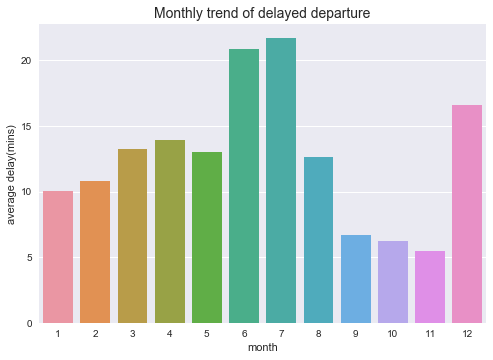

dep_delay           
           size       mean
month                     
1       27004.0  10.044533
2       24951.0  10.820183
3       28834.0  13.240960
4       28330.0  13.939634
5       28796.0  12.988823
6       28243.0  20.843690
7       29425.0  21.703549
8       29327.0  12.607261
9       27574.0   6.721082
10      28889.0   6.246079
11      27268.0   5.435347
12      28135.0  16.601737

In [13]:
df_month=df_flight.groupby(['month']).agg({'dep_delay':[np.size,np.mean]})
sns.barplot(df_month.index,df_month['dep_delay','mean'])
plt.ylabel('average delay(mins)')
plt.title('Monthly trend of delayed departure',fontsize=14)
plt.show()
df_month

### Monthly comparison of 3 airports interms of delay
1) Which airport in which month has maximum delay

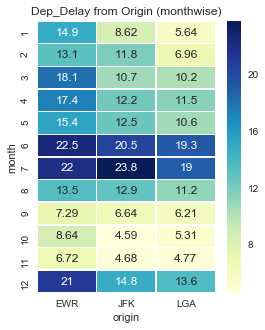

origin,EWR,JFK,LGA
month,,,
1,14.905748,8.615826,5.641560
2,13.067263,11.791355,6.961582
3,18.102457,10.721825,10.232041
4,17.400058,12.249059,11.508915
5,15.366141,12.519432,10.630508
6,22.470810,20.499729,19.296698
7,22.035112,23.769262,18.995163
8,13.493714,12.914358,11.244042
9,7.290954,6.635776,6.207439


In [17]:
df_flight_piv=df_flight.pivot_table(values='dep_delay', index=['month'],columns='origin')
plt.figure(figsize=(4,5))
sns.heatmap(df_flight_piv,cmap='YlGnBu',annot=True,linewidths=.5,linecolor='W',fmt='.3g')
plt.title('Dep_Delay from Origin (monthwise)')
plt.show()
df_flight_piv

### Is their any specific patten of three airports over the months? trend found

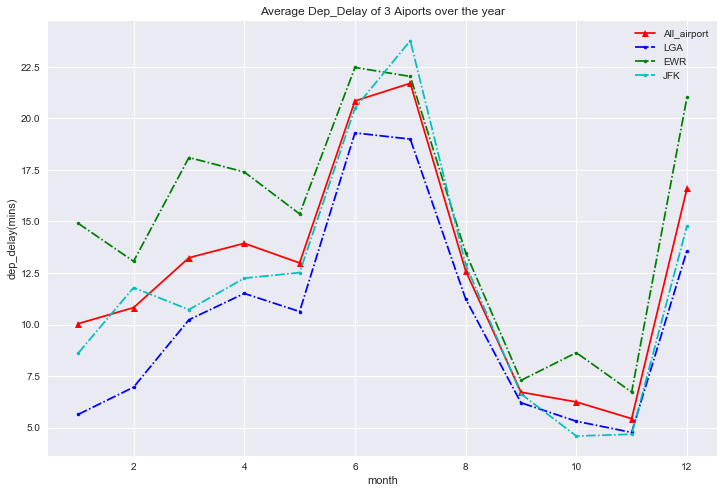

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df_month.index,df_month['dep_delay','mean'],'r-^',df_month.index,df_flight_piv.LGA,'b-..',
            df_flight_piv.index,df_flight_piv.EWR,'g-..',df_flight_piv.index,df_flight_piv.JFK,'c-..')
plt.title('Average Dep_Delay of 3 Aiports over the year')
plt.legend(('All_airport','LGA','EWR','JFK'))
plt.xlabel('month')
plt.ylabel('dep_delay(mins)')

### Is there any trend of dep_delay within days of months? trend found

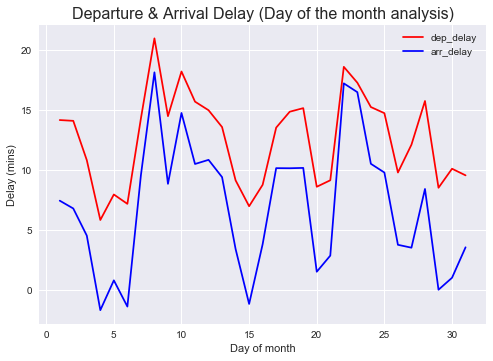

In [18]:
dep_delay=df_flight.groupby('day').agg({'dep_delay':np.mean})
arr_delay=df_flight.groupby('day').agg({'arr_delay':np.mean})
plt.plot(dep_delay.index,dep_delay,'r',arr_delay.index,arr_delay,'b',antialiased=True)
plt.title('Departure & Arrival Delay (Day of the month analysis)',fontsize=16)
plt.xlabel('Day of month')
plt.ylabel('Delay (mins)')
plt.legend(('dep_delay','arr_delay'))

### Which day of the year had highest delay? Maximum delay was on March 8,2013

In [21]:
df_flight_day=df_flight.pivot_table(values='dep_delay',index=['day'],columns='month')
df_flight_day.max()

month
1     27.038572
2     36.869460
3     70.774464
4     42.782019
5     42.676411
6     45.377542
7     53.179105
8     41.554569
9     48.884007
10    36.941919
11    21.500762
12    46.421417
dtype: float64

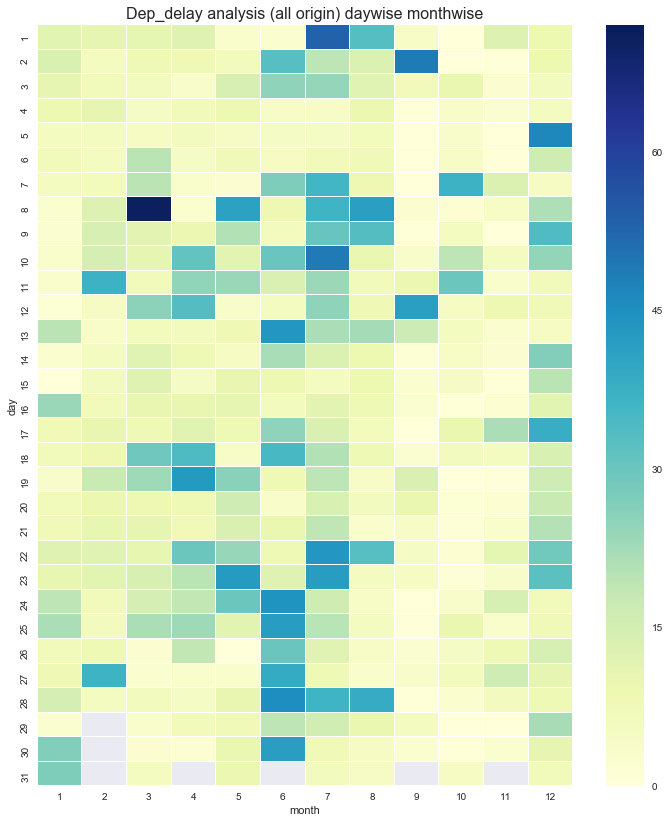

In [23]:
plt.figure(figsize=(12,14))
sns.heatmap(df_flight_day,vmin=0,vmax=72,cmap='YlGnBu',linecolor='white',linewidths=0.01)
plt.title('Dep_delay analysis (all origin) daywise monthwise',fontsize=16)

In [19]:
#sns.distplot(df_flight.dep_delay,bins=20,kde=True)

In [20]:
#df_flight.head()

### Finding percentage delay of 3 airport, EWR has 46% delay, it has highest average delay as well

In [21]:
sum(df_flight['dep_delay']>0)
#sns.pairplot(df_flight_sub)

136687

In [30]:
df_flight['dep_delay_count']=(df_flight['dep_delay']>0)
df_flight.head(2)
df_flight_dep_delay=df_flight.groupby('origin').agg({'dep_delay_count':(np.size,np.sum),'dep_delay':np.mean} )
df_flight_dep_delay['Percentage of Delay']=100*df_flight_dep_delay['dep_delay_count','sum']/df_flight_dep_delay['dep_delay_count','size']
df_flight_dep_delay

dep_delay_count           dep_delay Percentage of Delay
                  size      sum       mean                    
origin                                                        
EWR             120835  55950.0  15.153855           46.302810
JFK             111279  43894.0  12.142388           39.444999
LGA             104662  36843.0  10.393012           35.201888

### Total delay verses ontime

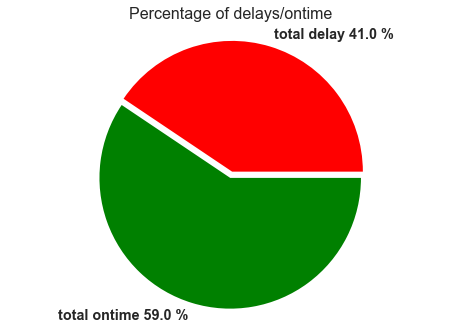

In [31]:
total_delay=sum(df_flight['dep_delay']>0)
total_non_delay=df_flight.dep_delay.size-total_delay
total_non_delay
lab=['total delay '+str(round(100*total_delay/df_flight.dep_delay.size))+' %',
     'total ontime '+str(round(100*total_non_delay/df_flight.dep_delay.size))+' %']
plt.pie([total_delay,total_non_delay],explode=[.05,0],colors=['red','green'],labels=lab,
       textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.axis('equal')
plt.title('Percentage of delays/ontime',fontsize=16)
plt.show()

### Airport wise contribution in delays of 41%, EWR has highest contribution, LGA is best performing in dep_delay

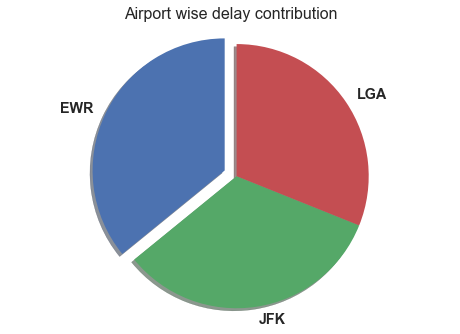

In [34]:
plt.pie(df_flight_dep_delay['dep_delay_count','size'],explode=[.1,0,0],
        labels=df_flight_dep_delay.index, startangle=90,shadow=True,
        textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.title('Airport wise delay contribution',fontsize=16)
plt.axis('equal')
plt.show()

### Finding Arrival delay percentage

In [35]:
df_flight['arr_delay_count']=(df_flight.arr_delay>0)
df_arr=df_flight.groupby('dest').agg({'arr_delay':[np.size,np.mean],'arr_delay_count':np.sum})
df_arr_s=df_arr.sort_values([('arr_delay','size')],ascending=False)
df_arr_s['percent of arr_delay']=100*df_arr_s['arr_delay_count','sum']/df_arr_s['arr_delay','size']
#df_arr_s.reset_index('dest')
df_arr_s

arr_delay            arr_delay_count percent of arr_delay
          size       mean             sum                     
dest                                                          
ORD    17283.0   5.949364          6773.0            39.188798
ATL    17215.0  11.375619          8324.0            48.353180
LAX    16174.0   0.533731          6011.0            37.164585
BOS    15508.0   2.971862          5134.0            33.105494
MCO    14082.0   5.484674          5655.0            40.157648
CLT    14064.0   7.427467          6203.0            44.105518
SFO    13331.0   2.717008          5033.0            37.754107
FLL    12055.0   8.126529          5356.0            44.429697
MIA    11728.0   0.337954          3962.0            33.782401
DCA     9705.0   9.179664          4564.0            47.027306
DTW     9384.0   5.492427          3563.0            37.968883
DFW     8738.0   0.387173          3141.0            35.946441
RDU     8163.0  10.112500          3759.0            46.049247
TPA     7466.0   7.455146          3116.0            41.735869
DEN     7266.0   8.606987          3306.0            45.499587
IAH     7198.0   4.277374          2983.0            41.442067
MSP     7185.0   7.318963          3026.0            42.115518
PBI     6554.0   8.587216          2935.0            44.781813
BNA     6333.0  11.914948          2968.0            46.865625
LAS     5997.0   0.249415          2128.0            35.484409
SJU     5819.0   2.547455          2211.0            37.996219
IAD     5700.0  13.982097          2692.0            47.228070
BUF     4681.0   8.985780          1878.0            40.119633
PHX     4656.0   2.091563          1852.0            39.776632
CLE     4573.0   9.238211          1953.0            42.707194
STL     4339.0  11.198455          2008.0            46.277944
MDW     4113.0  12.313933          1962.0            47.702407
CVG     3941.0  15.604083          1881.0            47.729003
SEA     3923.0  -1.124843          1281.0            32.653581
MSY     3799.0   6.567724          1572.0            41.379310
...        ...        ...             ...                  ...
BGR      375.0   8.135539           147.0            39.200000
BUR      371.0   8.145752           166.0            44.743935
PSE      365.0   8.081906           184.0            50.410959
OKC      346.0  31.125598           231.0            66.763006
SJC      329.0   3.412505           124.0            37.689970
TUL      315.0  33.739570           213.0            67.619048
OAK      312.0   3.054065           118.0            37.820513
BHM      297.0  16.846687           142.0            47.811448
SMF      284.0  12.118000           152.0            53.521127
AVL      275.0   8.186654           133.0            48.363636
ACK      265.0   4.825615           104.0            39.245283
ABQ      254.0   4.381890           107.0            42.125984
MVY      221.0   0.082185            68.0            30.769231
EGE      213.0   6.266583            95.0            44.600939
CRW      138.0  14.747863            68.0            49.275362
CAE      116.0  42.748871            97.0            83.620690
ILM      110.0   4.777340            43.0            39.090909
TVC      101.0  12.538273            37.0            36.633663
MYR       59.0   4.929596            22.0            37.288136
CHO       52.0   9.607748            25.0            48.076923
BZN       36.0   7.388889            16.0            44.444444
JAC       25.0  28.270769            21.0            84.000000
PSP       19.0 -12.350877             6.0            31.578947
EYW       17.0   6.352941            10.0            58.823529
HDN       15.0   1.888889             8.0            53.333333
MTJ       15.0   1.688889             6.0            40.000000
SBN       10.0   6.500000             4.0            40.000000
ANC        8.0  -2.500000             5.0            62.500000
LGA        1.0   0.000000             0.0             0.000000
LEX        1.0 -22.000000           

### Maximum flights went to which destination? 

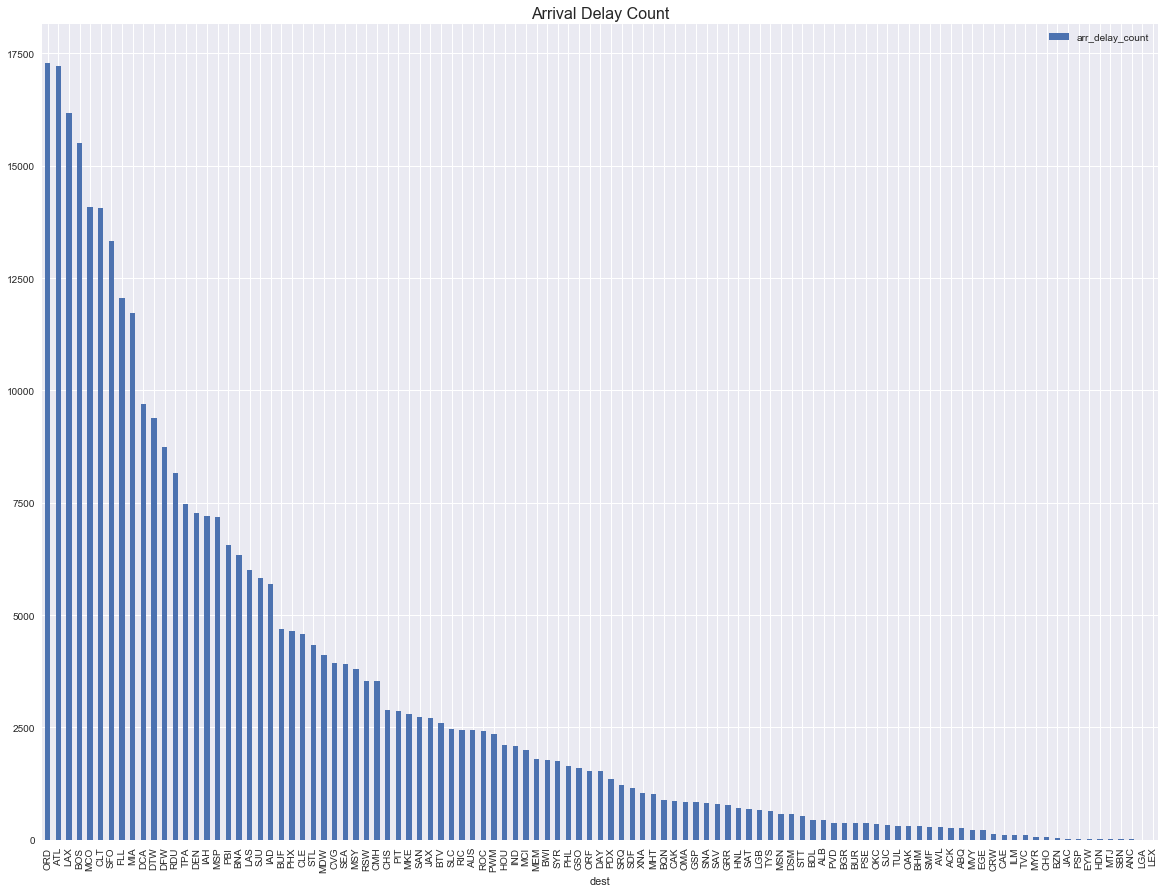

In [37]:
df_arr_s['arr_delay','size'].plot(kind='bar',figsize=(20,15))
plt.legend(['arr_delay_count'])
plt.title('Arrival Delay Count',fontsize=16)


### Most % delays occuring which airport? How they are stacked up?

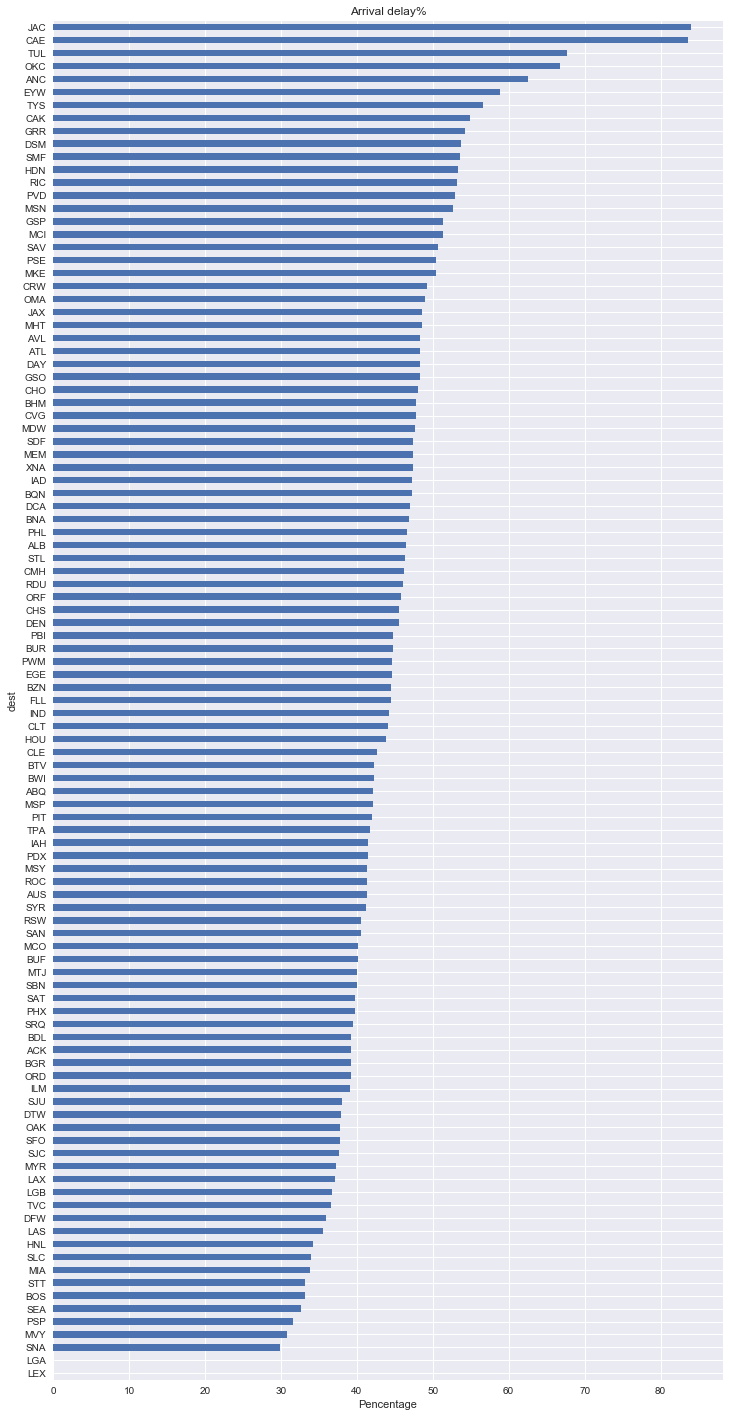

In [39]:
df_arr_s.sort_values('percent of arr_delay',ascending=True)['percent of arr_delay'].plot(kind='barh',figsize=(12,25))
plt.title('Arrival delay%')
plt.xlabel('Pencentage')

### Delay in route analysis

In [28]:
pd.set_option('display.max_columns',50)
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_count,arr_delay_count
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,True,True
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,True,True
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,True,True
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,False,False
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,False,False


In [29]:
df_flight.dep_delay_count!=df_flight.arr_delay_count

0         False
1         False
2         False
3         False
4         False
5          True
6          True
7         False
8         False
9          True
10        False
11        False
12         True
13        False
14         True
15        False
16        False
17        False
18         True
19         True
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30         True
31        False
32         True
33         True
34         True
35        False
36        False
37         True
38         True
39        False
40        False
41        False
42         True
43        False
44        False
45        False
46        False
47         True
48         True
49         True
50         True
51        False
52         True
53        False
54        False
55        False
56        False
57         True
58        False
59         True
60        False
61        False
62      

### Aircraft Carrier wise speed analysis-Highest speed(avg) to lowest average

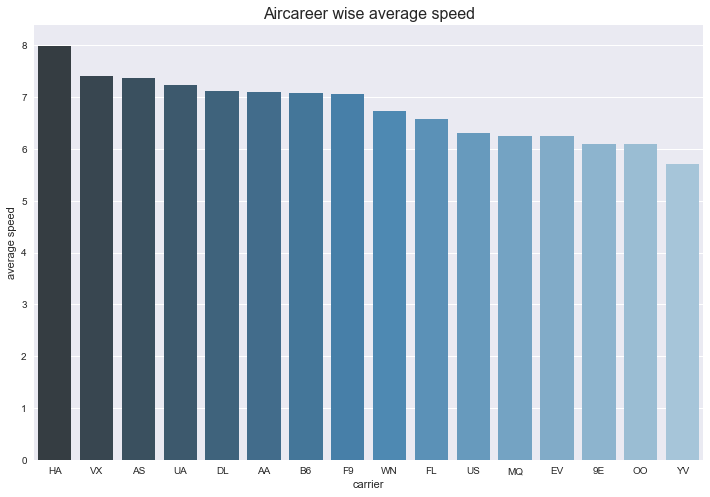

,air_time,distance,avg_speed
carrier,,,
HA,2.130960e+05,1704186,7.997269
VX,1.739497e+06,12902327,7.417275
AS,2.324924e+05,1715028,7.376706
UA,1.240974e+07,89705524,7.228638
DL,8.349918e+06,59507317,7.126694
AA,6.168957e+06,43864584,7.110534
B6,8.252212e+06,58384137,7.074968
F9,1.572671e+05,1109700,7.056150
WN,1.813401e+06,12229203,6.743796


In [46]:
df_flight_carrier_piv=df_flight.pivot_table(values=['air_time','distance'],index='carrier',aggfunc='sum')
df_flight_carrier_piv['avg_speed']=df_flight_carrier_piv['distance']/df_flight_carrier_piv['air_time']
df_flight_carrier_piv.sort_values('avg_speed',ascending=False,inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=df_flight_carrier_piv.index,y=df_flight_carrier_piv['avg_speed'],palette="Blues_d",)
plt.title('Aircareer wise average speed',fontsize=16)
plt.ylabel('average speed')
plt.show()
df_flight_carrier_piv

In [47]:
#Calculate Speed in a new column
df_flight['speed']=df_flight.distance/df_flight.air_time
df_flight.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_count,arr_delay_count,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,True,True,6.167401
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,True,True,6.237885


### How is the variation(Std Dev) of speed?


In [48]:
df_flight[['carrier','speed','distance','air_time']].describe()

,speed,distance,air_time
count,336776.000000,336776.000000,336776.000000
mean,6.559288,1039.912604,149.638388
std,1.009930,733.233033,93.340835
min,0.257576,17.000000,20.000000
25%,5.954082,502.000000,82.000000
50%,6.720000,872.000000,128.000000
75%,7.300912,1389.000000,190.000000
max,11.723077,4983.000000,695.000000


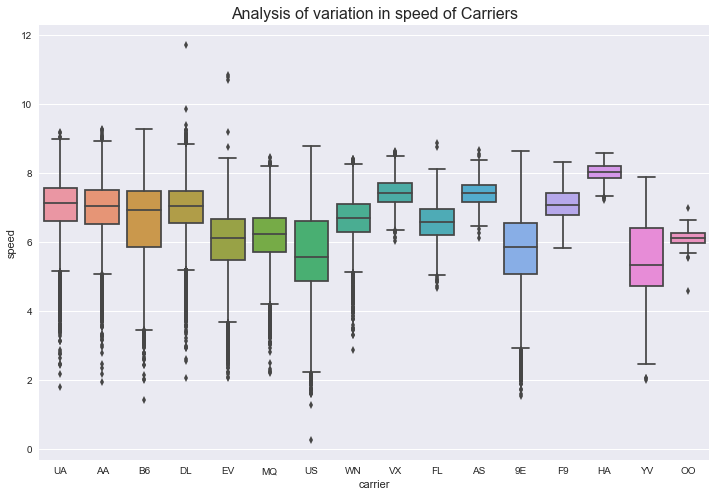

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(df_flight.carrier,df_flight.speed)
plt.title('Analysis of variation in speed of Carriers',fontsize=16)

### Is there any monthly trend of speed for carriers?

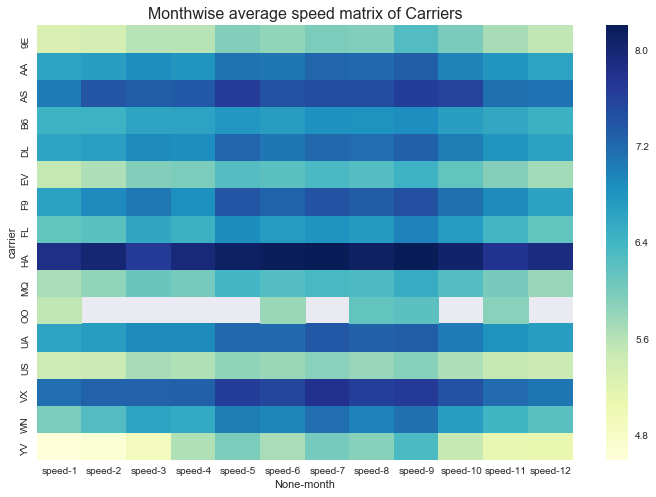

speed                                                              \
month          1         2         3         4         5         6         7    
carrier                                                                         
9E       5.273803  5.343646  5.605784  5.604115  5.931302  5.844992  5.977027   
AA       6.637484  6.689431  6.868146  6.809958  7.125098  7.106976  7.242199   
AS       7.041909  7.395602  7.314627  7.351728  7.680300  7.423316  7.478148   
B6       6.442149  6.451558  6.621321  6.649912  6.769719  6.723147  6.847523   
DL       6.616816  6.677950  6.920862  6.871882  7.225748  7.104423  7.207129   
EV       5.514122  5.659567  5.927339  5.972042  6.271519  6.199301  6.342005   
F9       6.662692  6.909540  7.072378  6.856544  7.393404  7.262102  7.425614   
FL       6.149752  6.217736  6.605404  6.466343  6.889228  6.729623  6.812420   
HA       7.854178  8.006479  7.690078  7.954634  8.117524  8.177960  8.204767   
MQ       5.690091  5.850128  6.107076  6.026370  6.389148  6.266780  6.357754   
OO       5.553030       NaN       NaN       NaN       NaN  5.785073       NaN   
UA       6.634789  6.699787  6.911528  6.899026  7.217003  7.198058  7.361768   
US       5.431516  5.481410  5.696715  5.647145  5.855701  5.791451  5.882066   
VX       7.155025  7.266063  7.267285  7.277678  7.648504  7.553066  7.799184   
WN       5.978111  6.276764  6.637497  6.561505  7.027092  6.947202  7.152617   
YV       4.595490  4.669843  4.912640  5.653589  5.968888  5.686911  6.023954   

                                                           
month          8         9         10        11        12  
carrier                                                    
9E       5.948180  6.277851  5.989955  5.704706  5.542992  
AA       7.204727  7.296210  6.982276  6.793059  6.648861  
AS       7.484559  7.644624  7.598353  7.142142  7.108616  
B6       6.825421  6.872332  6.690383  6.573349  6.465371  
DL       7.172633  7.282882  7.030539  6.807872  6.663347  
EV       6.263823  6.444887  6.157386  5.915641  5.731942  
F9       7.320368  7.460121  7.140592  6.899352  6.663442  
FL       6.752524  6.973926  6.729619  6.394447  6.149660  
HA       8.113484  8.207631  8.055444  7.792902  7.904328  
MQ       6.314667  6.520803  6.263409  6.001090  5.794961  
OO       6.148941  6.202627       NaN  5.879833       NaN  
UA       7.276827  7.302983  7.040877  6.827115  6.705643  
US       5.801847  5.896195  5.653832  5.503343  5.446197  
VX       7.631252  7.690890  7.423403  7.181036  7.087555  
WN       6.979800  7.137772  6.724542  6.413574  6.192603  
YV       5.906066  6.319583  5.499659  5.123466  5.095718

In [51]:
df_flight_carrier_piv=df_flight.pivot_table(values=['speed'],index='carrier',columns='month',aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(df_flight_carrier_piv,cmap='YlGnBu')
plt.title('Monthwise average speed matrix of Carriers',fontsize=16)
plt.show()
df_flight_carrier_piv

### Is there any coorelation between Speed and Distance? Hypothesis is longer distance travels have higher average speed. It is proved worng from scatter plot

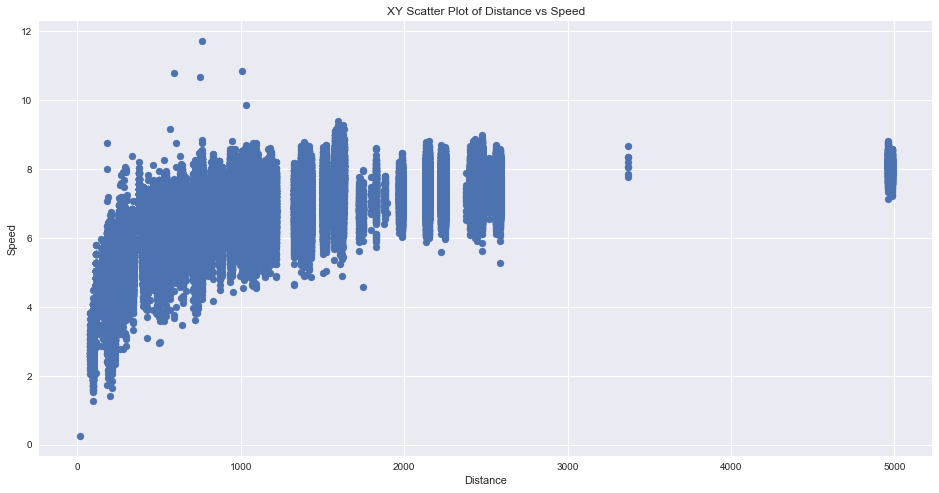

In [57]:
plt.figure(figsize=(16,8))
plt.scatter(df_flight.distance,df_flight.speed)
plt.title('XY Scatter Plot of Distance vs Speed')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

### How is the variation of operating distances for each carriers
1) It is found that fastest HA carrier has a low distance variability and operates at 5000 Km distance

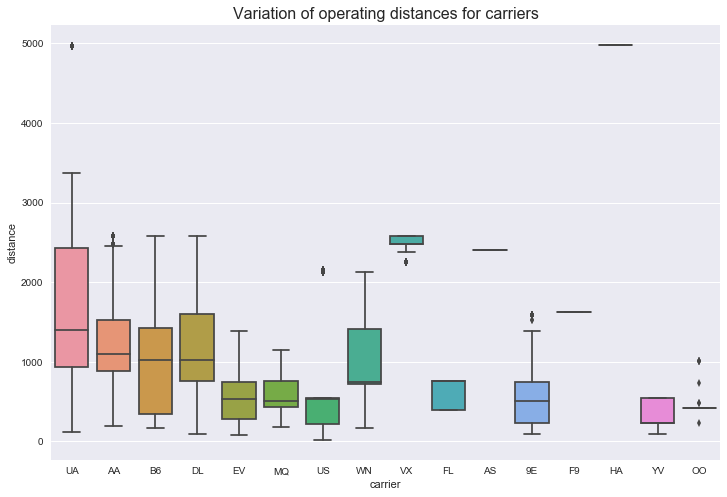

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot('carrier', 'distance',data=df_flight)
plt.title('Variation of operating distances for carriers',fontsize=16)